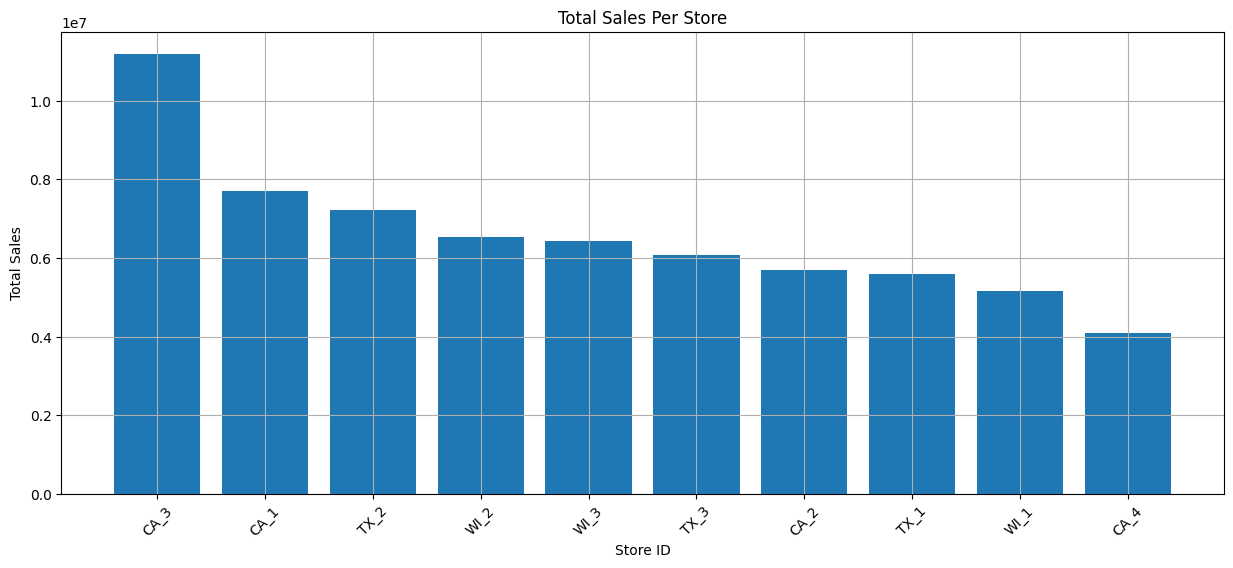

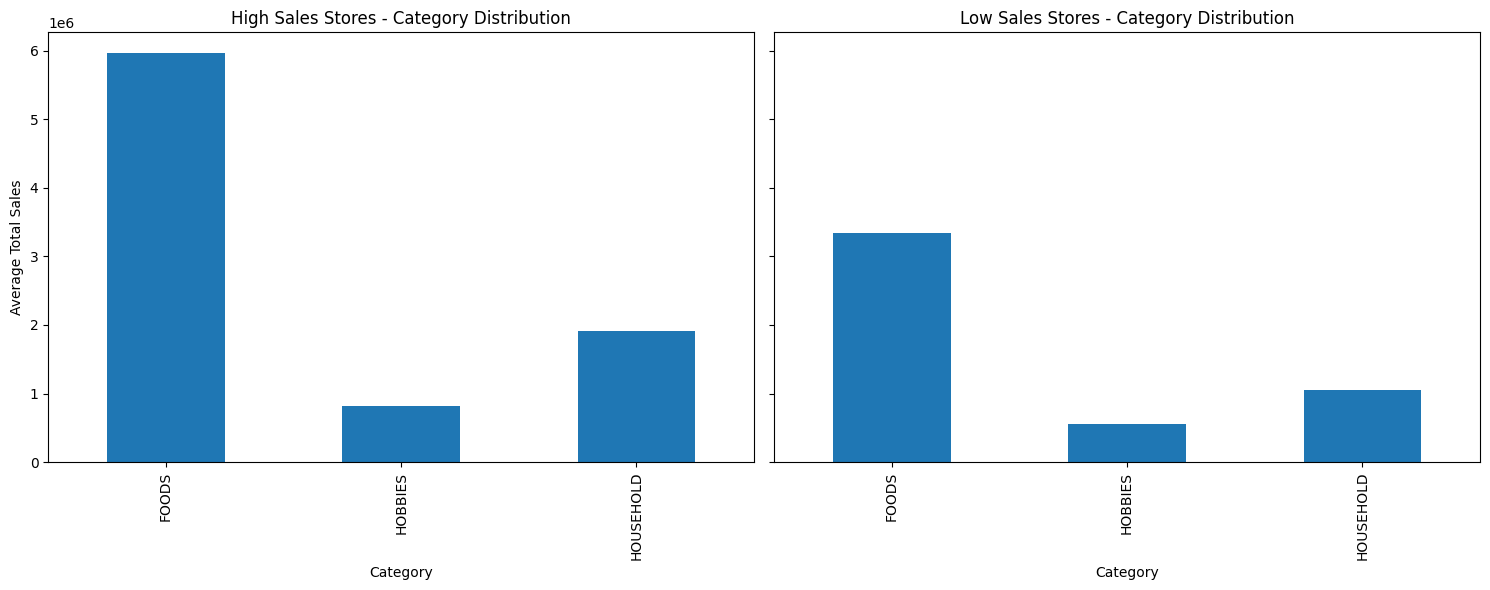

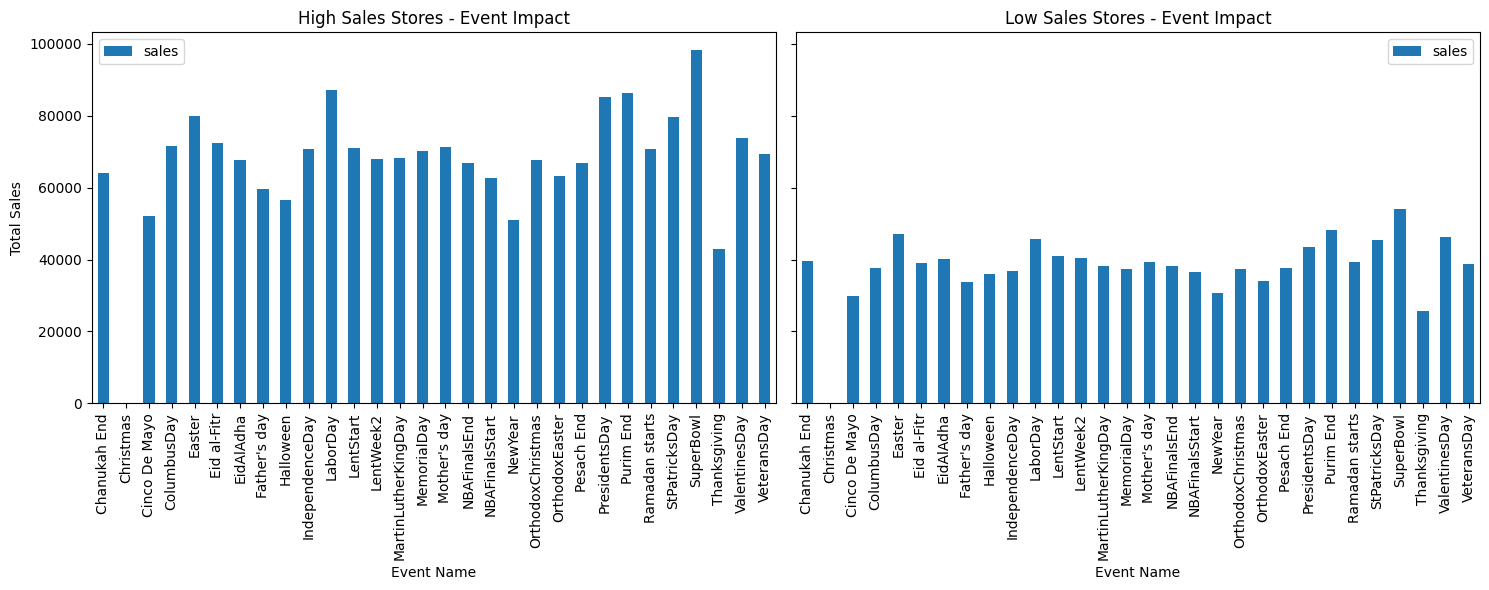

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load calendar data
calendar = pd.read_csv('calendar.csv')

# Load sales data
sales_train_validation = pd.read_csv('sales_train_validation.csv')

# Load sell prices data
sell_prices = pd.read_csv('sell_prices.csv')

# Extract the 'd_' columns
date_cols = [col for col in sales_train_validation.columns if col.startswith('d_')]

# Calculate total sales per store
sales_train_validation['total_sales'] = sales_train_validation[date_cols].sum(axis=1)
total_sales_per_store = sales_train_validation.groupby('store_id')['total_sales'].sum().reset_index()
total_sales_per_store = total_sales_per_store.sort_values(by='total_sales', ascending=False)

# Identify high and low sales stores
high_sales_stores = total_sales_per_store.head(3)['store_id'].tolist()
low_sales_stores = total_sales_per_store.tail(3)['store_id'].tolist()

# Plot total sales per store
plt.figure(figsize=(15, 6))
plt.bar(total_sales_per_store['store_id'], total_sales_per_store['total_sales'])
plt.title('Total Sales Per Store')
plt.xlabel('Store ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('Total_Sales_Per_Store.png')
plt.show()

# Analyze product category sales distribution for high and low sales stores
category_sales = sales_train_validation.groupby(['store_id', 'cat_id'])['total_sales'].sum().unstack().fillna(0)

# Plot product category sales distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

high_sales_data = category_sales.loc[high_sales_stores].mean()
low_sales_data = category_sales.loc[low_sales_stores].mean()

high_sales_data.plot(kind='bar', ax=axes[0], title='High Sales Stores - Category Distribution')
low_sales_data.plot(kind='bar', ax=axes[1], title='Low Sales Stores - Category Distribution')

axes[0].set_xlabel('Category')
axes[1].set_xlabel('Category')
axes[0].set_ylabel('Average Total Sales')
plt.tight_layout()
plt.savefig('Category_Sales_Distribution.png')
plt.show()

# Analyze the impact of events and promotions
event_impact = sales_train_validation.copy()
event_impact = event_impact.melt(id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
                                 var_name='d', value_name='sales')
event_impact = event_impact.merge(calendar[['d', 'event_name_1', 'event_name_2']], on='d', how='left')

event_impact_high = event_impact[event_impact['store_id'].isin(high_sales_stores)]
event_impact_low = event_impact[event_impact['store_id'].isin(low_sales_stores)]

event_impact_high = event_impact_high.groupby(['event_name_1'])['sales'].sum().reset_index()
event_impact_low = event_impact_low.groupby(['event_name_1'])['sales'].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

event_impact_high.plot(kind='bar', x='event_name_1', y='sales', ax=axes[0], title='High Sales Stores - Event Impact')
event_impact_low.plot(kind='bar', x='event_name_1', y='sales', ax=axes[1], title='Low Sales Stores - Event Impact')

axes[0].set_xlabel('Event Name')
axes[1].set_xlabel('Event Name')
axes[0].set_ylabel('Total Sales')
plt.tight_layout()
plt.savefig('Event_Impact.png')
plt.show()
